<a href="https://colab.research.google.com/github/m-zayed5722/Misc_Projects/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the needed libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns
from google.colab import files



In [ ]:
# Function to handle file upload and processing
def process_uploaded_file():
  uploaded = files.upload()
  for fn in uploaded.keys():
    df = pd.read_csv(fn)

    # Display first 5 rows
    print(df.head())

    # Display summary
    print(df.describe())


# Call the function to start the process
process_uploaded_file()

In [ ]:
uploaded = files.upload()

Saving df0.csv to df0 (6).csv


In [ ]:
for fn in uploaded.keys():
  df = pd.read_csv(fn)

In [ ]:
#remove 1st column
df = df.drop(df.columns[0], axis=1)


In [ ]:
df.columns

Index(['Shot rate', '000.Total  cycle time  [s]',
       '009. Plasticizing  time [s]', '008.Filling  time [s]',
       '015.Peak  value Inj.  Pressure  [psi]',
       '016. Change- over Inj.  Pressure  [psi]', '012.Min.melt  cushion [in]',
       '014.Volume  for end HP  [in]', '111.Cooling  time [s]',
       '112.Holding  pressure  time [s]',
       '092.Peak  value  Holding  pressure  [psi]',
       '136.Injection  volume [in]', '056.current  time [s]', 'machine_id',
       'order', 'datetime', 'filepath', 'group_id'],
      dtype='object')

In [ ]:
# Sample DataFrame (use your own 'df' in place of this sample)
df2 = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))

# -------------------------
# 1. Scatter Plot
# -------------------------
fig = px.scatter(df2, x='A', y='B', color='C',
                 title="Scatter Plot with Numeric Columns")
fig.show()

# -------------------------
# 2. Heatmap
# -------------------------
fig = px.imshow(df2.corr(),
                text_auto=True, aspect="auto",
                title="Correlation Heatmap")
fig.show()


In [ ]:
#Remove object data type columns to be suitable for machine learning tasks
object_columns = df.select_dtypes(include=['object']).columns
df = df.drop(object_columns, axis=1)

In [ ]:
# Load your dataset (replace with your file path and loading method)
#data = pd.read_csv("your_data.csv")
#df = pd.DataFrame(data)

# Define Isolation Forest model with contamination parameter
# Adjust contamination based on expected anomaly proportion
isolation_forest = IsolationForest(contamination=0.1, random_state=42)

# Extract the relevant columns for prediction
columns_for_prediction = df.columns

# Fit the model to the data
isolation_forest.fit(df)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.1, random_state=42)

In [ ]:
# Add anomaly scores as a new column
df['anomaly_score'] = isolation_forest.decision_function(df[columns_for_prediction])

In [ ]:
df.head(1)

,Shot rate,000.Total cycle time [s],009. Plasticizing time [s],008.Filling time [s],015.Peak value Inj. Pressure [psi],016. Change- over Inj. Pressure [psi],012.Min.melt cushion [in],014.Volume for end HP [in],111.Cooling time [s],112.Holding pressure time [s],092.Peak value Holding pressure [psi],136.Injection volume [in],056.current time [s],group_id,anomaly_score
0,8868,86.31,23.11,6.41,2338.0,2338.0,0.82,0.83,33.0,13.0,802.0,11.24,3.49,1,0.140838


In [ ]:
# Add a column indicating inlier/outlier (-1: outlier, 1: inlier)
df['anomaly'] = isolation_forest.predict(df[columns_for_prediction])

In [ ]:
df.head(1)

,Shot rate,000.Total cycle time [s],009. Plasticizing time [s],008.Filling time [s],015.Peak value Inj. Pressure [psi],016. Change- over Inj. Pressure [psi],012.Min.melt cushion [in],014.Volume for end HP [in],111.Cooling time [s],112.Holding pressure time [s],092.Peak value Holding pressure [psi],136.Injection volume [in],056.current time [s],group_id,anomaly_score,anomaly
0,8868,86.31,23.11,6.41,2338.0,2338.0,0.82,0.83,33.0,13.0,802.0,11.24,3.49,1,0.140838,1


In [ ]:
df.head()

,Shot rate,000.Total cycle time [s],009. Plasticizing time [s],008.Filling time [s],015.Peak value Inj. Pressure [psi],016. Change- over Inj. Pressure [psi],012.Min.melt cushion [in],014.Volume for end HP [in],111.Cooling time [s],112.Holding pressure time [s],092.Peak value Holding pressure [psi],136.Injection volume [in],056.current time [s],group_id,anomaly_score
0,8868,86.31,23.11,6.41,2338.0,2338.0,0.82,0.83,33.0,13.0,802.0,11.24,3.49,1,0.140838
1,8869,86.27,23.09,6.41,2322.0,2322.0,0.80,0.80,33.0,13.0,802.0,11.27,3.51,1,0.134202
2,8870,86.28,22.59,6.40,2306.0,2306.0,0.78,0.78,33.0,13.0,802.0,11.30,3.52,1,0.130491
3,8871,86.25,22.56,6.41,2348.0,2347.0,0.85,0.85,33.0,13.0,802.0,11.22,3.54,1,0.135063
4,8872,86.25,22.85,6.40,2355.0,2351.0,0.83,0.83,33.0,13.0,802.0,11.24,3.55,1,0.138652


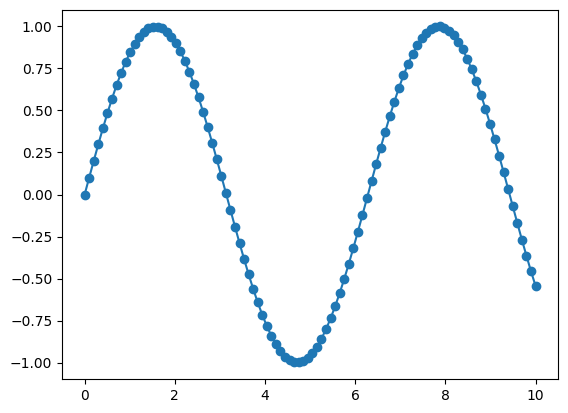

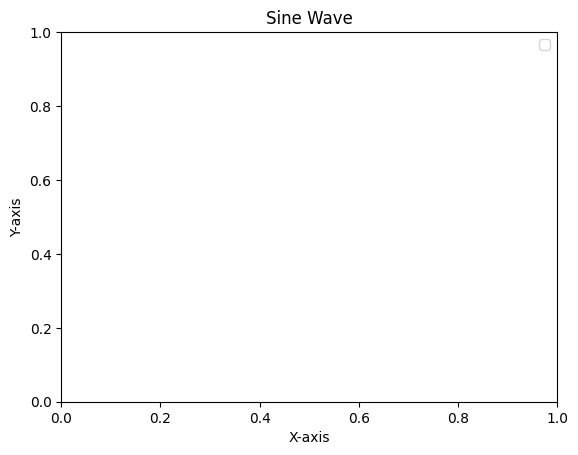

In [ ]:

# Create some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Error 1: Incorrect function name for plotting
#scatter plot
plt.scatter(x, y, label='Data points')
#plt.plt(x, y, label='Sine Wave')  # Incorrect function name plt.plt instead of plt.plot
plt.plot(x, y, label='Sine Wave')
plt.show()

# Error 2: Missing plt.show() to display the plot
plt.legend()
plt.title('Sine Wave')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()  # Missing plt.show() to display the plot


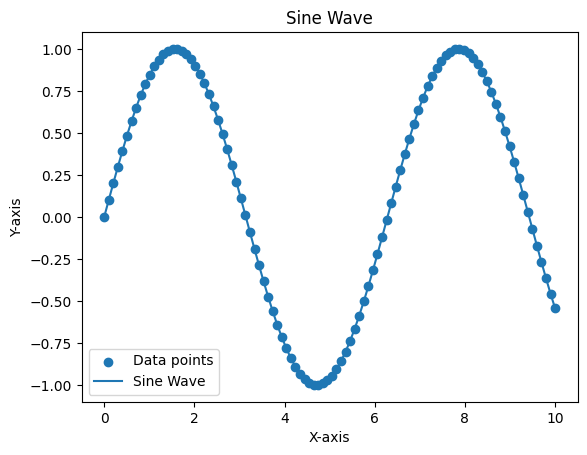

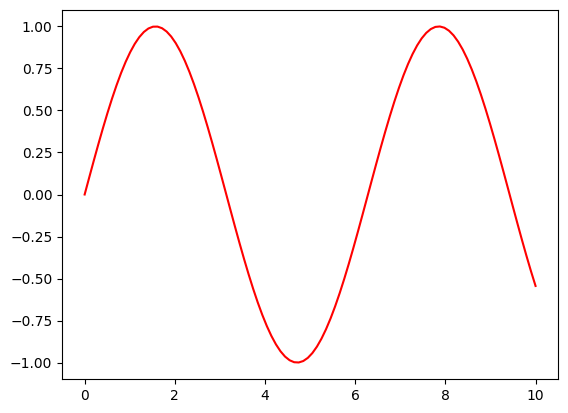

In [ ]:


# Create some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Error 1: Incorrect function name for plotting
plt.scatter(x, y, label='Data points')
plt.plot(x, y, label='Sine Wave')  # Incorrect function name plt.plt instead of plt.plot

# Error 2: Missing plt.show() to display the plot
plt.legend()
plt.title('Sine Wave')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()  # Missing plt.show() to display the plot

# Error 3: Using a non-existent color parameter
plt.plot(x, y, label='Cosine Wave', color='red')  # Intentional error: 'colorr' instead of 'color'


ValueError: could not convert string to float: 'B'

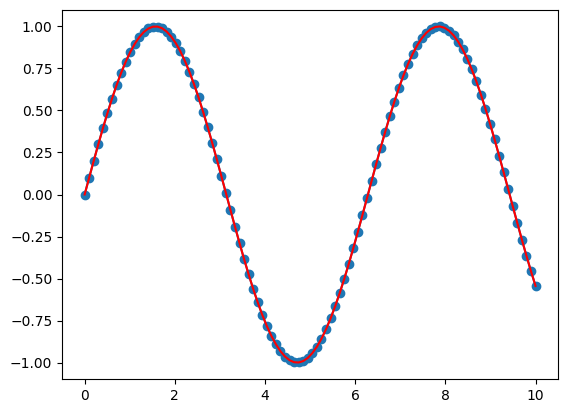

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.linspace(0, 10, 100)
y = np.sin(x)
df = pd.DataFrame({'X': x, 'Y': y, 'RandomString': np.random.choice(['A', 'B', 'C'], size=len(x))})

plt.scatter(df['X'], df['Y'], label='Data points')
plt.plt(df['X'], df['Y'], label='Sine Wave')

plt.plot(df['X'], df['Y'], label='Cosine Wave', colorr='red')

#set isolation forest model with specific parameters e,g, contamination ratio
isolation_forest = IsolationForest(contamination=0.1, random_state=42)

isolation_forest.fit(df)

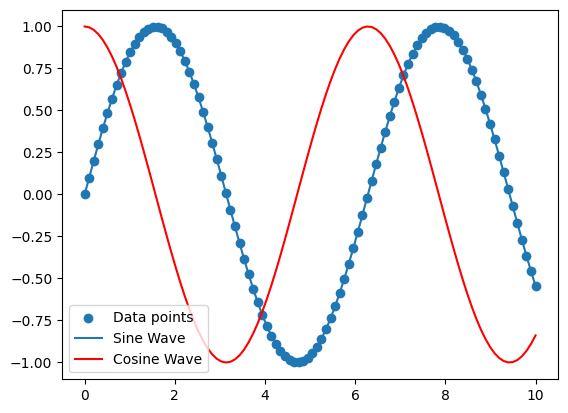

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.1, random_state=42)

In [ ]:

x = np.linspace(0, 10, 100)
y = np.sin(x)
y_cos = np.cos(x)  # Calculate cosine

df = pd.DataFrame({'X': x, 'Y': y})  # Remove 'RandomString' for Isolation Forest

plt.scatter(df['X'], df['Y'], label='Data points')
plt.plot(df['X'], y, label='Sine Wave')
plt.plot(df['X'], y_cos, label='Cosine Wave', color='red')

plt.legend() # Add a legend
plt.show()

# Isolation Forest (for numerical data only)
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(df[['X', 'Y']])  # Pass only the numerical columns


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.1, random_state=42)

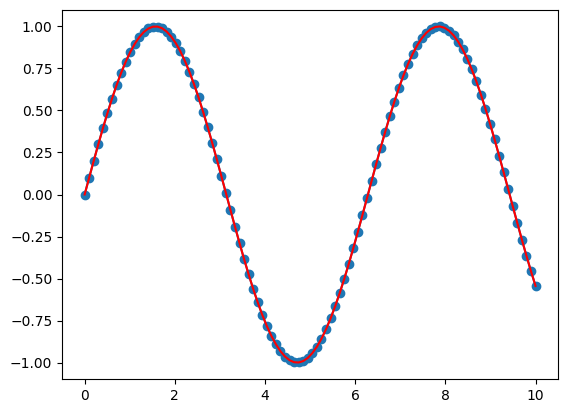

In [ ]:

x = np.linspace(0, 10, 100)
y = np.sin(x)
df = pd.DataFrame({'X': x, 'Y': y, 'RandomString': np.random.choice(['A', 'B', 'C'], size=len(x))})

plt.scatter(df['X'], df['Y'], label='Data points')
plt.plot(df['X'], df['Y'], label='Sine Wave')
plt.plot(df['X'], df['Y'], label='Cosine Wave', color='red')

isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(df[['X', 'Y']])  # Fit using only X and Y columns


In [ ]:
# Creating a DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'Salary': [50000, 60000, 70000]}

df = pd.DataFrame(data)

# Syntax Error 1: Missing quotation marks around column names
df.columns = ['Name', 'Age', 'Salary']  # Syntax error: Missing quotation marks around 'Name'

# Syntax Error 2: Unmatched parentheses
df['TotalIncome'] = df['Salary'] * df['Age']  # Syntax error: Unmatched parentheses

# Semantic Error: Incorrect calculation of TotalIncome
df['TotalIncome'] = df['Salary'] * df['Age'] - 5000  # Semantic error: Incorrect calculation


In [ ]:
for n_esti in n_estimators_values:
        isf_model = IsolationForest(n_estimators=n_esti, contamination='auto', random_state=42)
        isf_model.fit(X_train)
        anomaly_scores = isf_model.decision_function(X_test)


        thresholds = np.linspace(min(anomaly_scores), max(anomaly_scores), num=100)  # Adjust the range and number of thresholds as desired
        evaluation_results = []

        for threshold in thresholds:

            predicted_labels = [1 if score >= threshold else -1 for score in anomaly_scores]


            accuracy = accuracy_score(true_labels, predicted_labels)
            precision = precision_score(true_labels, predicted_labels, pos_label=-1)
            recall = recall_score(true_labels, predicted_labels, pos_label=-1)
            f1 = f1_score(true_labels, predicted_labels, pos_label=-1)


            evaluation_results.append((threshold, accuracy, precision, recall, f1))


        thresholds, accuracies, precisions, recalls, f1_scores = zip(*evaluation_results)


        plt.figure(figsize=(10, 6))
        plt.plot(thresholds, accuracies, label='Accuracy')
        plt.plot(thresholds, precisions, label='Precision')
        plt.plot(thresholds, recalls, label='Recall')
        plt.plot(thresholds, f1_scores, label='F1-Score')
        plt.xlabel('Threshold')
        plt.ylabel('Score')
        plt.title('Evaluation Metrics vs. Threshold'+  ', # of features: ' + str(n_esti))
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
# Creating a DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Subject': ['Math', 'Biology', 'Chemistry'],
        'Grade': ['A-', 'B-', 'B+']}

df = pd.DataFrame(data)

# Syntax Error 1: Missing quotation marks around column names
df.columns = ['Name', 'Subject', 'Grade']  # Syntax error: Missing quotation marks around 'Name'

# Syntax Error 2: Unmatched parentheses

# Semantic Error: Incorrect calculation of TotalIncome


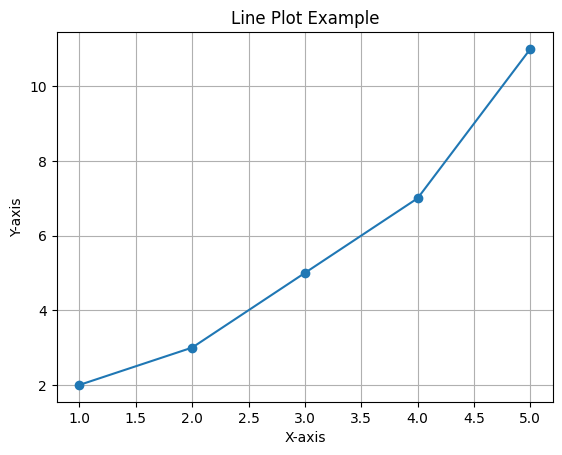

In [ ]:
#simple line plot example
# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a line plot
plt.plot(x, y, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot Example')

# Show grid
plt.grid(True)

# Show plot
plt.show()

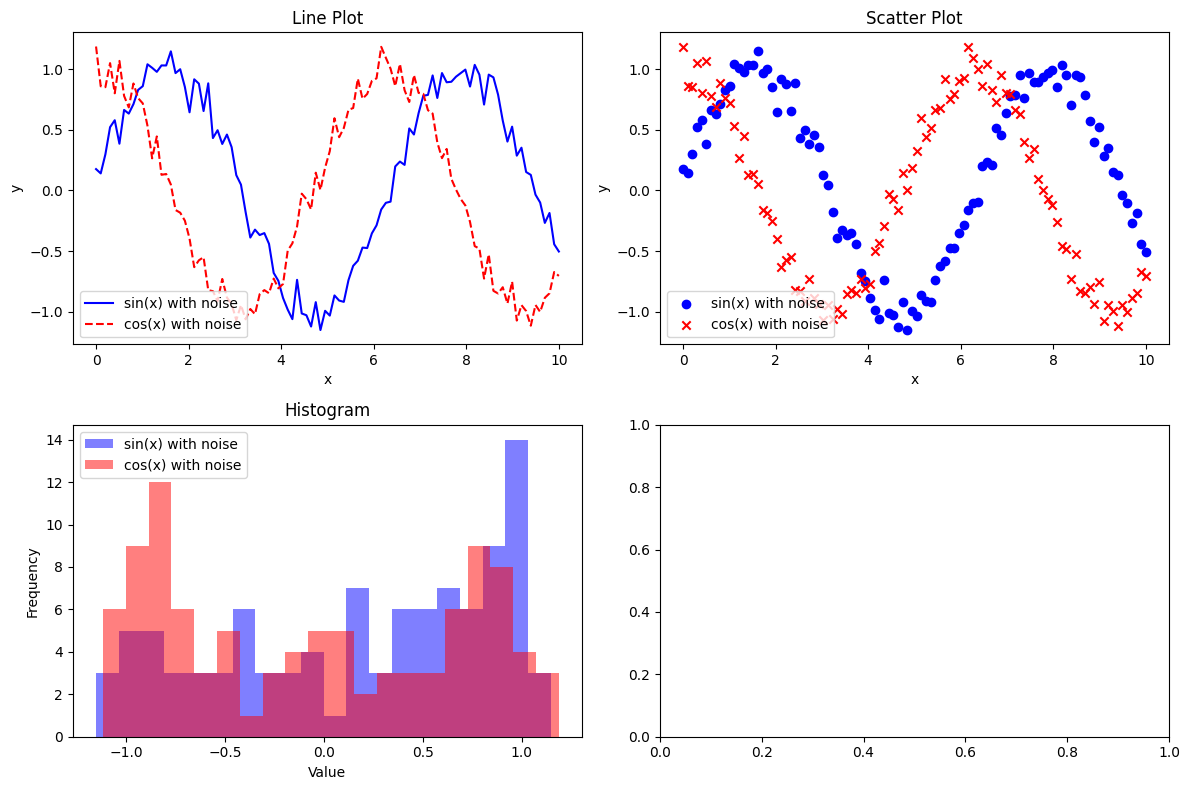

In [ ]:
# Generate sample data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y1 = np.sin(x) + np.random.normal(0, 0.1, 100)
y2 = np.cos(x) + np.random.normal(0, 0.1, 100)
categories = np.random.choice(['A', 'B', 'C'], size=100)
sizes = np.random.randint(10, 100, size=100)

# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Line plot
axs[0, 0].plot(x, y1, label='sin(x) with noise', color='blue')
axs[0, 0].plot(x, y2, label='cos(x) with noise', color='red', linestyle='--')
axs[0, 0].set_title('Line Plot')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')
axs[0, 0].legend()

# Plot 2: Scatter plot
axs[0, 1].scatter(x, y1, label='sin(x) with noise', color='blue')
axs[0, 1].scatter(x, y2, label='cos(x) with noise', color='red', marker='x')
axs[0, 1].set_title('Scatter Plot')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')
axs[0, 1].legend()

# Plot 3: Histogram
axs[1, 0].hist(y1, bins=20, alpha=0.5, label='sin(x) with noise', color='blue')
axs[1, 0].hist(y2, bins=20, alpha=0.5, label='cos(x) with noise', color='red')
axs[1, 0].set_title('Histogram')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()

# Plot 4: Scatter plot with different categories and sizes
#axs[1, 1].scatter(x, y1, s=sizes, c=categories, alpha=0.5)
#axs[1, 1].set_title('Scatter Plot with Categories and Sizes')
#axs[1, 1].set_xlabel('x')
#axs[1, 1].set_ylabel('y')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

<ipython-input-5-7a6f48604c93>:22: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  sns.heatmap(pivot_df.sum(level='Product'), annot=True, fmt=".1f", cmap="YlGnBu")
<ipython-input-5-7a6f48604c93>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Month')['Sales'].sum().reset_index(), x='Month', y='Sales', palette='viridis')
<ipython-input-5-7a6f48604c93>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product', y='Sales', palette='Set3')


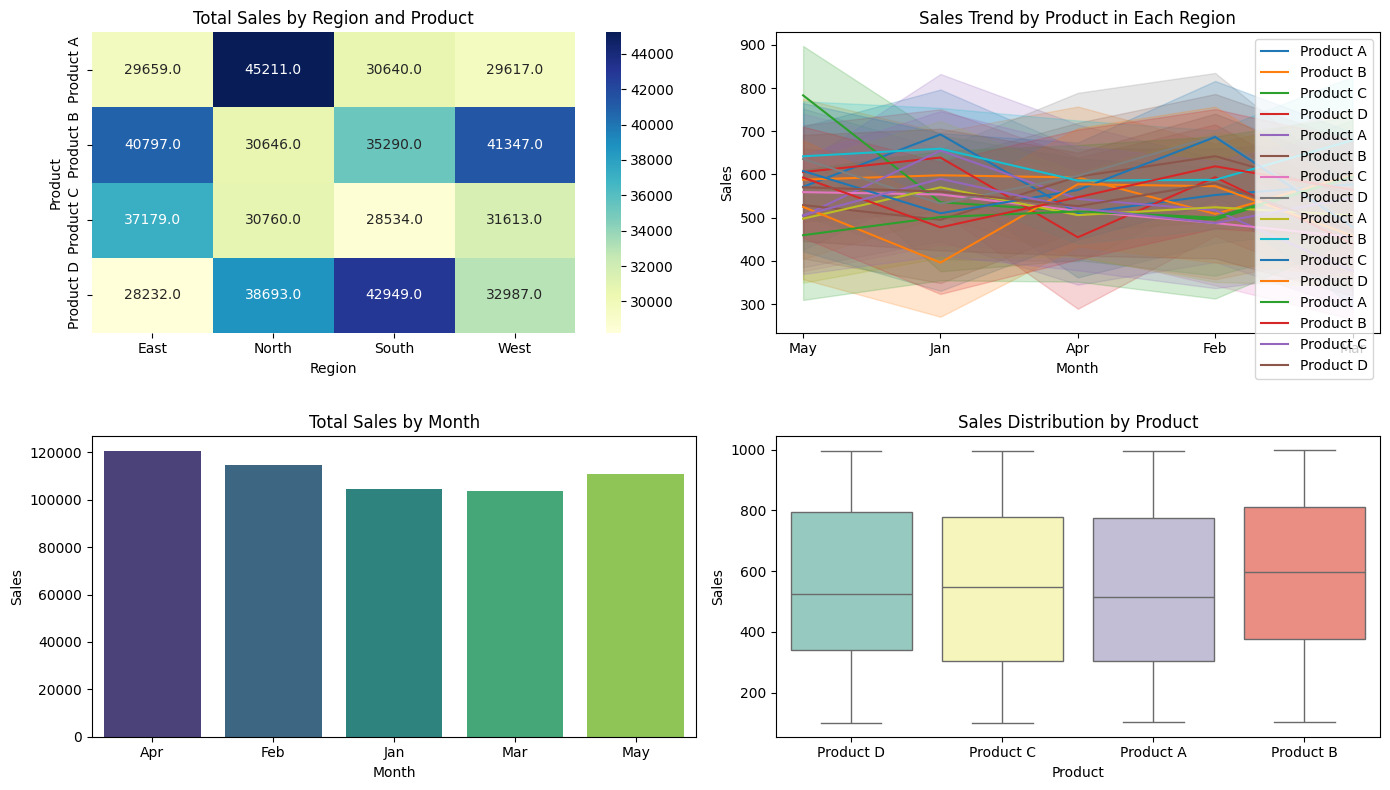

In [ ]:
# Generate sample data
np.random.seed(0)
regions = ['North', 'South', 'East', 'West']
products = ['Product A', 'Product B', 'Product C', 'Product D']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
data = {
    'Region': np.random.choice(regions, 1000),
    'Product': np.random.choice(products, 1000),
    'Month': np.random.choice(months, 1000),
    'Sales': np.random.randint(100, 1000, size=1000)
}
df = pd.DataFrame(data)

# Pivot the data for visualization
pivot_df = df.pivot_table(index=['Month', 'Product'], columns='Region', values='Sales', aggfunc='sum')

# Create a complex visualization
plt.figure(figsize=(14, 8))

# Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(pivot_df.sum(level='Product'), annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Total Sales by Region and Product')

# Line plot for each region
plt.subplot(2, 2, 2)
for region in regions:
    for product in products:
        sns.lineplot(data=df[(df['Region'] == region) & (df['Product'] == product)], x='Month', y='Sales', label=product)
plt.title('Sales Trend by Product in Each Region')
plt.legend()

# Bar plot for total sales by month
plt.subplot(2, 2, 3)
sns.barplot(data=df.groupby('Month')['Sales'].sum().reset_index(), x='Month', y='Sales', palette='viridis')
plt.title('Total Sales by Month')

# Box plot for sales distribution by product
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Product', y='Sales', palette='Set3')
plt.title('Sales Distribution by Product')

plt.tight_layout()
plt.show()


<ipython-input-2-bf8fddae47bf>:22: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  sns.heatmap(pivot_df.sum(level='Product'), annot=True, fmt=".1f", cmap="YlGnBu")
<ipython-input-2-bf8fddae47bf>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Month')['Sales'].sum().reset_index(), x='Month', y='Sales', palette='viridis')
<ipython-input-2-bf8fddae47bf>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product', y='Sales', palette='Set3')
<ipython-input-2-bf8fddae47bf>:44: MatplotlibDeprecationWarning: Au

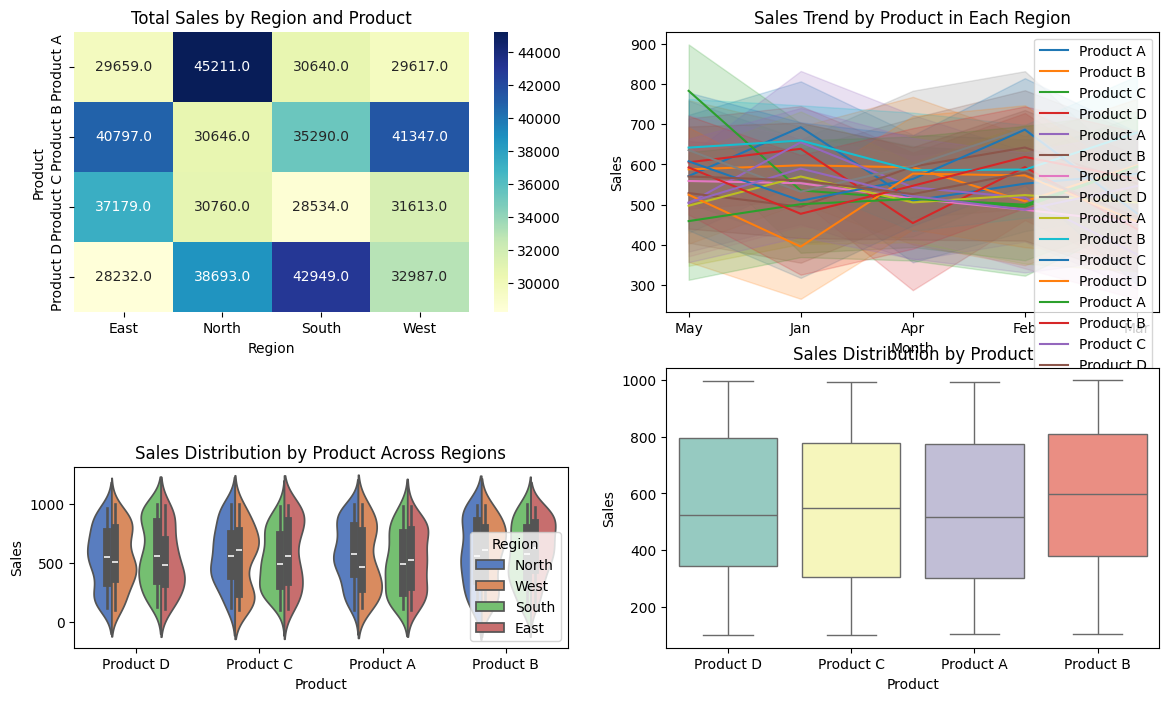

In [ ]:
# Generate sample data
np.random.seed(0)
regions = ['North', 'South', 'East', 'West']
products = ['Product A', 'Product B', 'Product C', 'Product D']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
data = {
    'Region': np.random.choice(regions, 1000),
    'Product': np.random.choice(products, 1000),
    'Month': np.random.choice(months, 1000),
    'Sales': np.random.randint(100, 1000, size=1000)
}
df = pd.DataFrame(data)

# Pivot the data for visualization
pivot_df = df.pivot_table(index=['Month', 'Product'], columns='Region', values='Sales', aggfunc='sum')

# Create a complex visualization
plt.figure(figsize=(14, 8))

# Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(pivot_df.sum(level='Product'), annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Total Sales by Region and Product')

# Line plot for each region
plt.subplot(2, 2, 2)
for region in regions:
    for product in products:
        sns.lineplot(data=df[(df['Region'] == region) & (df['Product'] == product)], x='Month', y='Sales', label=product)
plt.title('Sales Trend by Product in Each Region')
plt.legend()

# Bar plot for total sales by month
plt.subplot(2, 2, 3)
sns.barplot(data=df.groupby('Month')['Sales'].sum().reset_index(), x='Month', y='Sales', palette='viridis')
plt.title('Total Sales by Month')

# Box plot for sales distribution by product
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Product', y='Sales', palette='Set3')
plt.title('Sales Distribution by Product')

# Violin plot for sales distribution by product across regions
plt.subplot(3, 2, 5)
sns.violinplot(data=df, x='Product', y='Sales', hue='Region', split=True, palette='muted')
plt.title('Sales Distribution by Product Across Regions')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


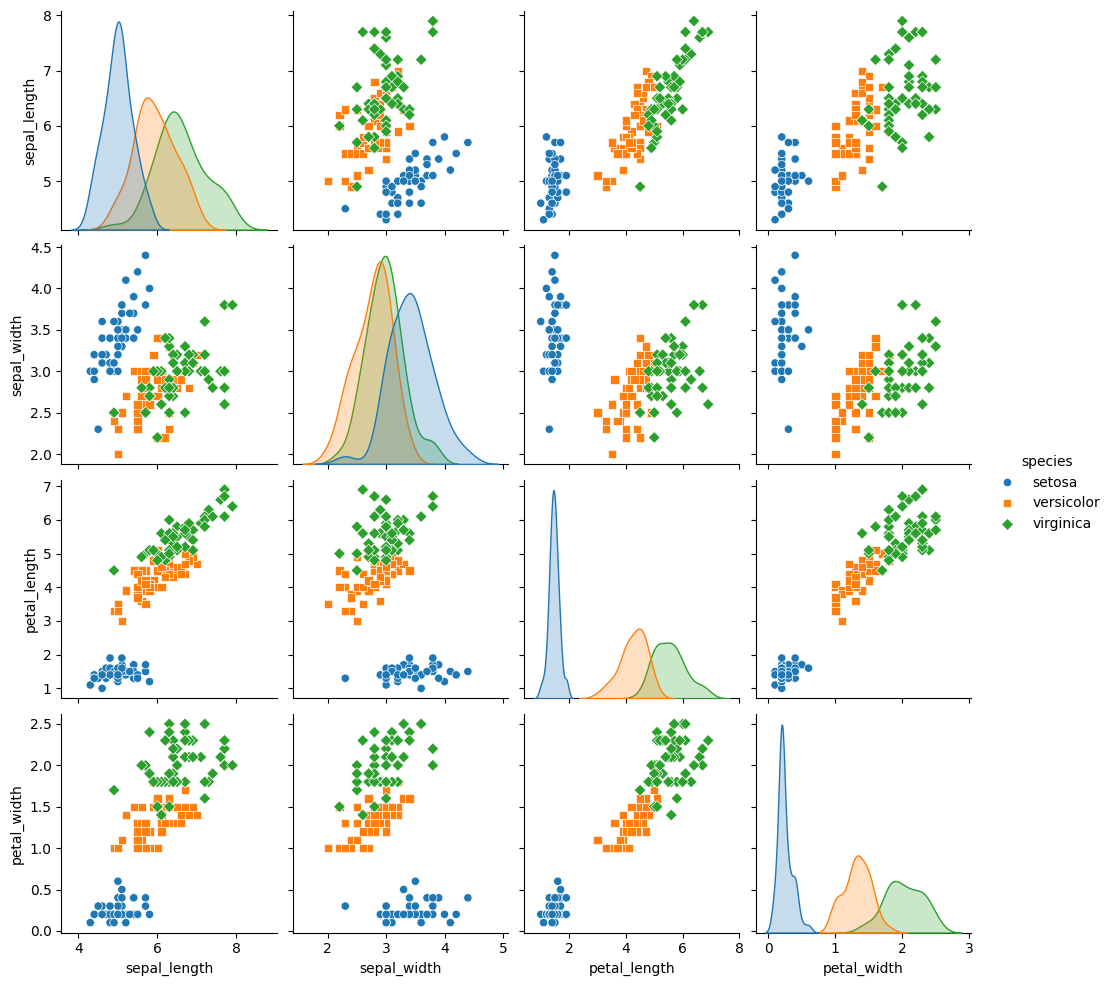

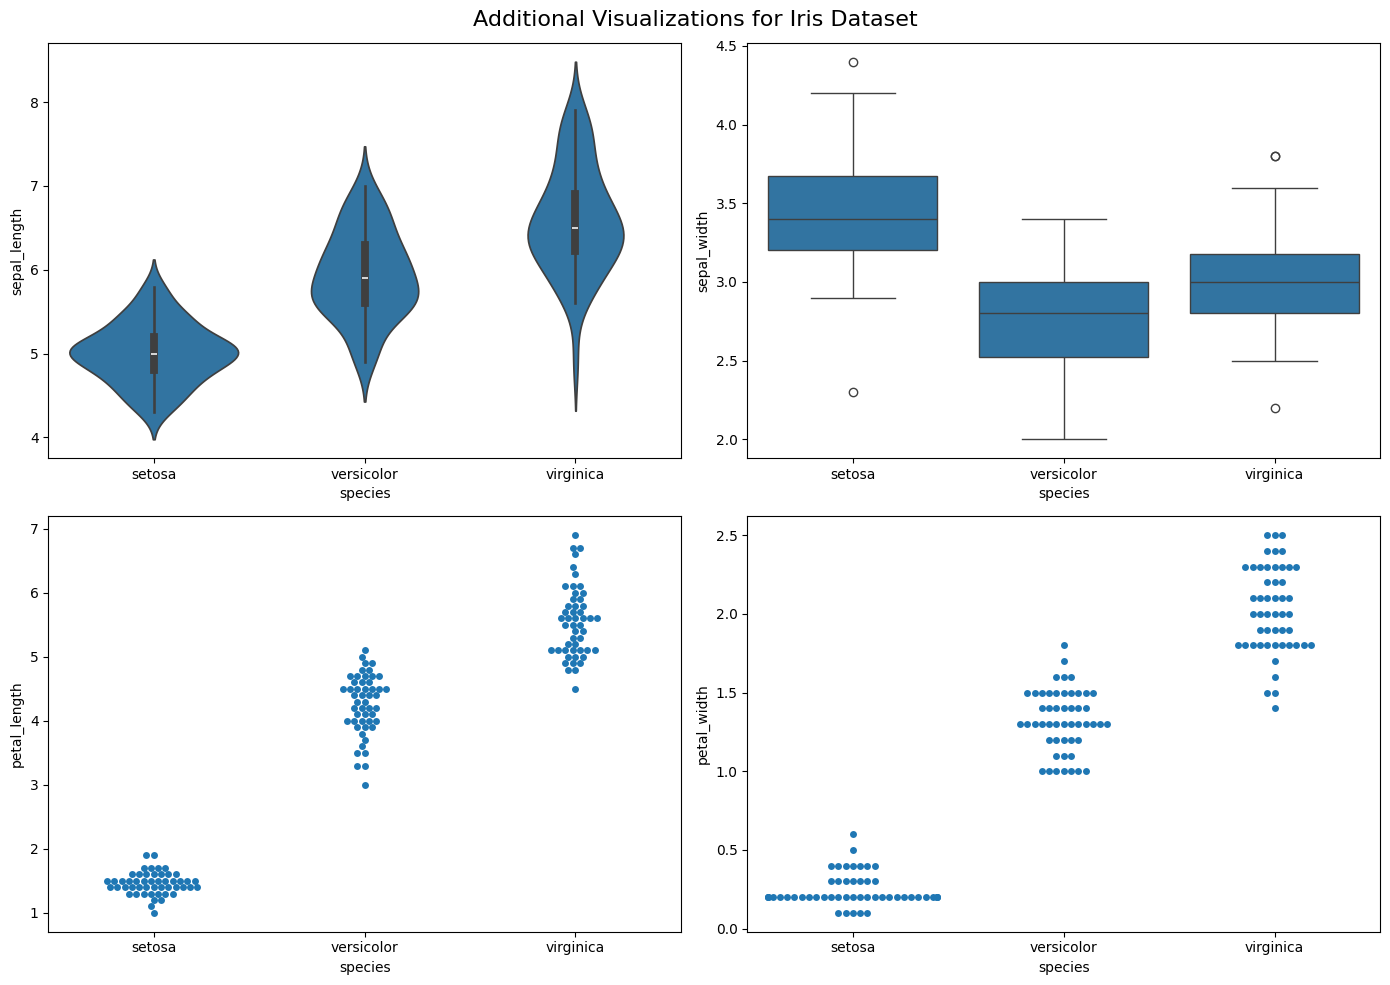

In [2]:
# Load the Iris dataset
iris = sns.load_dataset("iris")

# Create a scatter plot matrix
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

# Create additional visualizations
plt.figure(figsize=(14, 10))

# Violin plot for sepal length by species
plt.subplot(2, 2, 1)
sns.violinplot(x="species", y="sepal_length", data=iris)

# Box plot for sepal width by species
plt.subplot(2, 2, 2)
sns.boxplot(x="species", y="sepal_width", data=iris)

# Swarm plot for petal length by species
plt.subplot(2, 2, 3)
sns.swarmplot(x="species", y="petal_length", data=iris)

# Swarm plot for petal width by species
plt.subplot(2, 2, 4)
sns.swarmplot(x="species", y="petal_width", data=iris)

plt.suptitle("Additional Visualizations for Iris Dataset", fontsize=16)
plt.tight_layout()
plt.show()